In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from matplotlib import pyplot as plt
%matplotlib inline

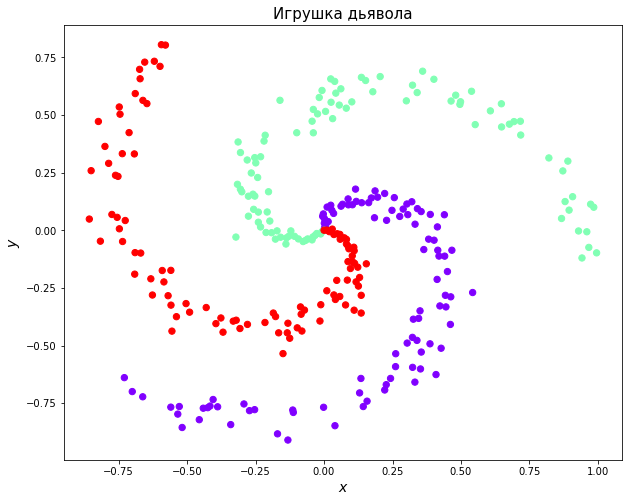

In [3]:
# http://cs231n.github.io/neural-networks-case-study/#linear

N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j
    
    
plt.figure(figsize=(10, 8))

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.title('Игрушка дьявола', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

In [7]:
X = torch.FloatTensor(X)
y = torch.LongTensor(y)

D_in, H, D_out = 2, 100, 3

In [8]:
# class with params

class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.f_lin = nn.Linear(D_in, H)
        self.s_lin = nn.Linear(H, D_out)
        
    def forward(self, X):
        X = F.relu(self.f_lin(X))
        return F.softmax(self.s_lin(X))

In [11]:
model = MyModule()
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), 1e-1)

<ipython-input-8-7baeac4cea73>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(self.s_lin(X))


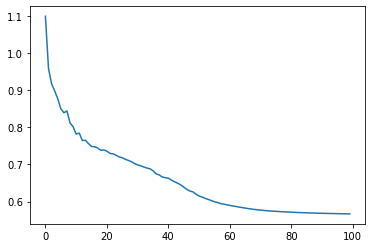

In [12]:
losses = []

for i in range(100):
    y_pred = model(X)
    loss=loss_fn(y_pred, y)
    losses.append(loss.item())
    
    optim.zero_grad()
    loss.backward()
    optim.step()
    
plt.plot(losses)

In [13]:
# class withput params

class MyModule2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layers = [nn.Linear(D_in, H), nn.Linear(H, D_out)]
        self.my_useless_bias = torch.ones(1, H, requires_grad=True)
        self.more_of_my_useless_biases = [
            torch.ones(1, H, requires_grad=True),
            torch.ones(1, H, requires_grad=True),
            torch.ones(1, H, requires_grad=True)
        ]
        
    def forward(self, X):
        X = F.relu(self.linear_layers[0](X))
        X += self.my_useless_bias
        return F.softmax(self.linear_layers[1](X))
    
model = MyModule2()
list(model.parameters())

[]

In [14]:
# correct

class MyModule3(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layers = nn.ModuleList([nn.Linear(D_in, H), nn.Linear(H, D_out)])
        self.my_useless_bias = nn.Parameter(torch.ones(1, H, requires_grad=True))
        self.more_of_my_useless_biases = nn.ParameterList([
            nn.Parameter(torch.ones(1, H, requires_grad=True)),
            nn.Parameter(torch.ones(1, H, requires_grad=True)),
            nn.Parameter(torch.ones(1, H, requires_grad=True))
        ])
        
    def forward(self, X):
        X = F.relu(self.linear_layers[0](X))
        X += self.my_useless_bias
        for b in self.more_of_my_useless_biases:
            X += b
        return F.softmax(self.linear_layers[1](X))
    
model = MyModule3()
list(model.parameters())

[Parameter containing:
 tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True),
 Parameter containing:
 tensor([[-0.3883, -0.2807],
         [ 0.4238, -0.3940],
         [ 0.6673, -0.1480],
         [-0.5012, -0.4029],
         [ 0.1274,  0.0702],
         [-0.1700, -0.0574],
         [ 0.6077,  0.0162],
         [-0.3378, -0.6576],
         [-0.4685, -0.0800],
         [ 0.2631,  0.4961],
         [ 0.5056,  0.2669],
         [-0.4811,  0.4195],
         [-0.6864, -0.6816],
         [ 0.0916, -0.2856],
         [ 0.0591,  0.5665],
         [-0.1294, -0.6652],
       